# EIT-CEM Forward Problem

In [1]:
from EIT_CEM_app import *
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [26]:
"Electrodes and Mesh"
ele_pos=electrodes_position(L=16, per_cober=0.5, rotate=0)
mesh_forward=MyMesh(r=1, n=10*2, n_in=8*10, n_out=3*2, electrodes_obj=ele_pos)

#### Malhas

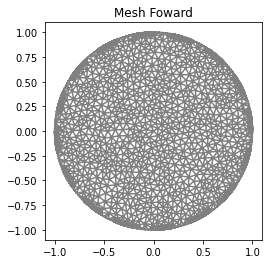

In [27]:
plot(mesh_forward, title="Mesh Forward");

## Problema Direto

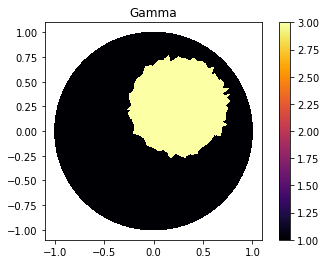

In [28]:
"Gamma function"
ValuesCells0=GammaCircle(mesh_forward,3.0,1.0,0.50, 0.25, 0.25);
gamma0=CellFunction(mesh_forward, values=ValuesCells0)

"Plot"
V_DG=FiniteElement('DG',mesh_forward.ufl_cell(),0)
gamma_forward=plot_figure(mesh_forward, V_DG, gamma0, name="Gamma");

### Forward Problem

In [29]:
"Forward Problem"
L=16
VD=FiniteElement('CG',mesh_forward.ufl_cell(),1) #Lagrange pol. degree 1
l=int(L)                                        #Measurements number.
z=np.ones(L)*0.025E-5                           #Impedance
I_all=current_method(L,l, method=2, value=1)    #Current pattern

#Solver
ForwardObject=ForwardProblem(mesh_forward,  ele_pos,  z)
list_u0, list_U0 = ForwardObject.solve_forward(VD, gamma0, I_all, l)
list_U0 = ForwardObject.sol_asarray()

#### Fronteira da solução

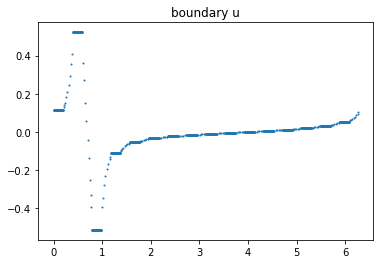

In [30]:
index=1
u_data=getBoundaryVertex(mesh_forward, list_u0[index]);
data_u0=plot_boundary(mesh_forward, data=u_data, name='boundary u', line=0);

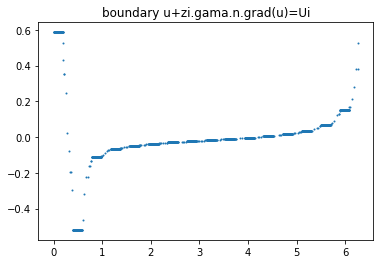

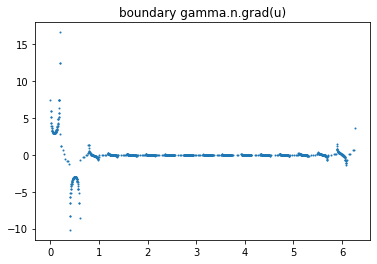

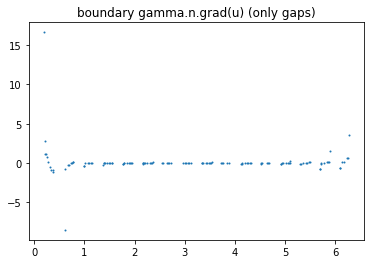

In [31]:
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=1)
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=2)
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=3)

In [32]:
ForwardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=1)

Current values
Calculated: 0.8323 Expected: 1.0
Calculated: -0.8028 Expected: -1.0
Calculated: -0.0019 Expected: 0.0
Calculated: -0.0012 Expected: 0.0
Calculated: -0.0004 Expected: 0.0
Calculated: -0.0001 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: 0.0002 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: -0.0002 Expected: 0.0
Calculated: 0.0005 Expected: 0.0
Calculated: 0.0012 Expected: 0.0
Calculated: 0.0074 Expected: 0.0
Soma das correntes calculada:  0.03517066018683186


In [33]:
ForwardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=2)

Potential values
Calculated: 0.58677 Expected: 0.58677
Calculated: -0.51934 Expected: -0.51934
Calculated: -0.11312 Expected: -0.11312
Calculated: -0.06419 Expected: -0.06419
Calculated: -0.04701 Expected: -0.04701
Calculated: -0.03692 Expected: -0.03692
Calculated: -0.02935 Expected: -0.02935
Calculated: -0.02291 Expected: -0.02291
Calculated: -0.01683 Expected: -0.01683
Calculated: -0.01057 Expected: -0.01057
Calculated: -0.0036 Expected: -0.0036
Calculated: 0.00492 Expected: 0.00492
Calculated: 0.01642 Expected: 0.01642
Calculated: 0.03434 Expected: 0.03434
Calculated: 0.06799 Expected: 0.06799
Calculated: 0.15339 Expected: 0.15339


### Plot u

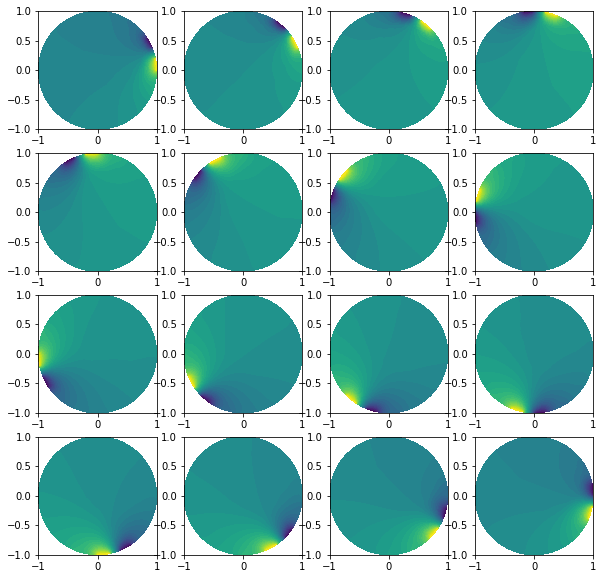

In [34]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Solver

### Plot Noise

In [35]:
"Getting noised solution"
noise_level=0.05
noise_type='uniform'
if noise_level>1E-10: list_U0_noised = ForwardObject.add_noise(noise_level, noise_type, seed=1)

print(list_U0_noised[0:L])

[ 0.6004682  -0.52450059 -0.1175794  -0.07323799 -0.03971378 -0.05632847
 -0.01463521 -0.02932798 -0.01413808 -0.01267018  0.00872847 -0.01245514
  0.0137049   0.0311059   0.07755273  0.14411768]


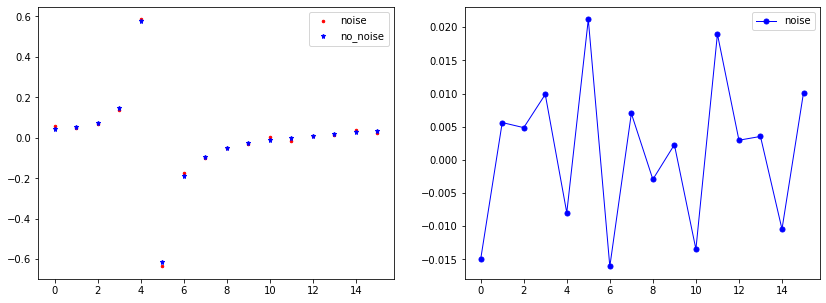

In [36]:
"Plot electrodes noise."
index=4 #Index in array
if noise_level>1E-5:
    vec_U0_noise=list_U0_noised[index*L:(index+1)*L]
    vec_U0=list_U0[index*L:(index+1)*L]
    x=range(len(vec_U0_noise))

    plt.figure(figsize=(14, 5),)
    plt.subplot(1,2,1)
    plt.plot(x, vec_U0_noise, linewidth=0,  marker='.', markersize=5, label="noise", color='red');
    plt.plot(x, vec_U0, linewidth=0,  marker='*', markersize=5, label="no_noise", color="blue");
    plt.legend()
   
    plt.subplot(1,2,2)
    plt.plot(x, vec_U0-vec_U0_noise, linewidth=1,  marker='.', markersize=10, label="noise", color="blue");
    plt.legend()
    
    plt.show()